In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import os

In [2]:
final = pd.DataFrame()

In [3]:
for root,_,files in os.walk('data/portuguese_referenses/assin'):
    for file in files:
        # print(file)
        tree = ET.parse(fr'data/portuguese_referenses/assin/{file}')
        root = tree.getroot()
        dados = []
        for pair in root.findall('pair'):
            sentenca1 = pair.find('t').text.strip()
            sentenca2 = pair.find('h').text.strip()
            tipo = pair.attrib.get('entailment')
            dados.append({'sentenca_1': sentenca1, 'sentenca_2': sentenca2, 'tipo_entailment': tipo, 'arquivo':file})
        final = pd.concat([final,pd.DataFrame(dados)])


In [4]:
splits = {'train': 'data/train-00000-of-00001.parquet', 'validation': 'data/validation-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
sick = pd.read_parquet("hf://datasets/eduagarcia/sick-br/" + splits["train"])

c:\Users\Administrator\anaconda3\envs\concreta\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
sick = sick[['sentence_A','sentence_B','entailment_label']].rename(columns={'sentence_A':'sentenca_1','sentence_B':'sentenca_2','entailment_label':'tipo_entailment'})

In [6]:
sick['arquivo'] ='sick'

In [7]:
final = pd.concat([final,sick])

In [8]:
final['tipo_entailment'] = final['tipo_entailment'].str.lower()

In [9]:
final['tipo_entailment'].unique()

array(['none', 'entailment', 'paraphrase', 'neutral', 'contradiction'],
      dtype=object)

In [10]:
final.groupby('tipo_entailment',as_index=False)[['arquivo']].count()

,tipo_entailment,arquivo
0,contradiction,641
1,entailment,8078
2,neutral,2524
3,none,12040
4,paraphrase,604


<Axes: xlabel='tipo_entailment'>

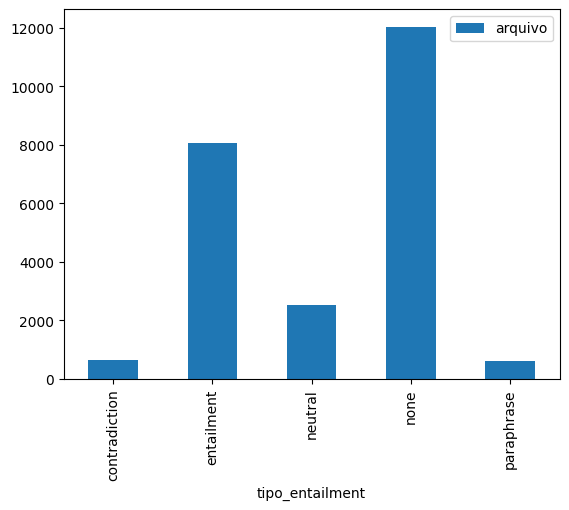

In [11]:
final.groupby('tipo_entailment',as_index=False)[['arquivo']].count().plot(kind='bar',x='tipo_entailment',y='arquivo')

In [12]:
# final.loc[final['tipo_entailment']=='entailment'].to_excel('entailment_full.xlsx', index=False)
# final.loc[final['tipo_entailment']=='contradiction'].to_excel('contradiction_full.xlsx', index=False)

In [8]:
import pandas as pd

In [9]:
nli_br = pd.read_excel(r'C:\Users\Administrator\Desktop\Repositórios\SimCSE\data\portuguese_nli_real\nli_br.xlsx')

In [11]:
nli_br.rename(columns={'st_1':'sent0','st_2':'sent1','contradiction':'hard_neg'}).drop('source', axis=1).to_csv('pt_nli_for_simcse_real.csv',index=False)